In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
RESULTS_BASE_PATH = 'RESULTS'

NODES = [(5, 8), (8, 5), (5, 12), (8, 12)]

plt.rcParams['figure.figsize'] = [13, 10]
# FAILUER_TIME = 16000

In [4]:
def load_results(exp_name):
    exp_path = os.path.join(RESULTS_BASE_PATH, exp_name)
    y_test = np.load(os.path.join(exp_path, "true.npy"))
    y_predicted = np.load(os.path.join(exp_path, "predicted.npy"))

    return (y_test, y_predicted)

def absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.abs((y_true - y_pred) / y_true) * 100

def plot_prediction(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'Prediction - {title}')
    plt.plot(x_axis, y_test, label='real', linewidth=1)
    plt.plot(x_axis, y_predicted, label='predicted', linewidth=1)
    plt.legend()
    plt.show()

def plot_percentage_error(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'Error - {title}')
    error = absolute_percentage_error(y_test, y_predicted)
    plt.plot(x_axis, error, label='error', linewidth=1)
    plt.show()

def analyze_experiment_singlestep(exp_name, node, subsection=(0, 100)):
    y_test, y_predicted = load_results(exp_name)
    y_test = y_test.reshape(-1)
    y_predicted = y_predicted.reshape(-1)

    print(f'NODE {node} - TOTAL MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    y_test = y_test[subsection[0] : subsection[1]]
    y_predicted = y_predicted[subsection[0] : subsection[1]]

    print(f'NODE {node} - SECTION MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    plot_prediction(y_test, y_predicted, node)
    plot_percentage_error(y_test, y_predicted, node)

def analyze_all_experiments_singlestep(exp_name, subsection=(0, 100)):
    for n_from, n_to in NODES:
        analyze_experiment_singlestep(f'{exp_name}___{n_from}to{n_to}', f'{n_from} to {n_to}', subsection)


NODE 5 to 8 - TOTAL MAPE:  0.5657057652851738
NODE 5 to 8 - SECTION MAPE:  0.19355130746663354


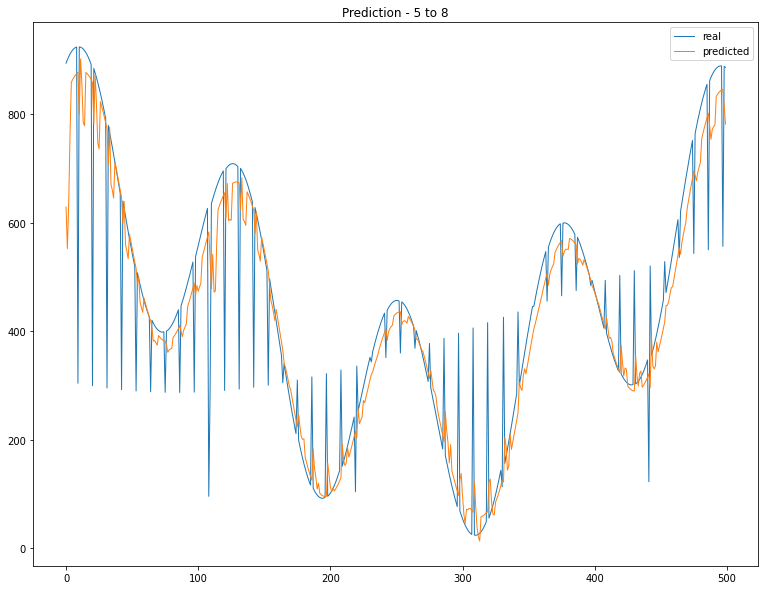

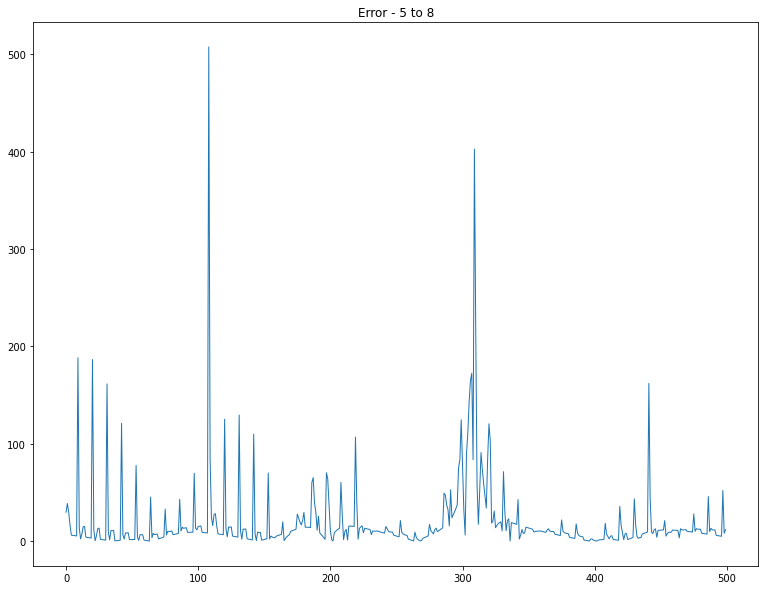

NODE 8 to 5 - TOTAL MAPE:  0.869881870706727
NODE 8 to 5 - SECTION MAPE:  9.368205447305522


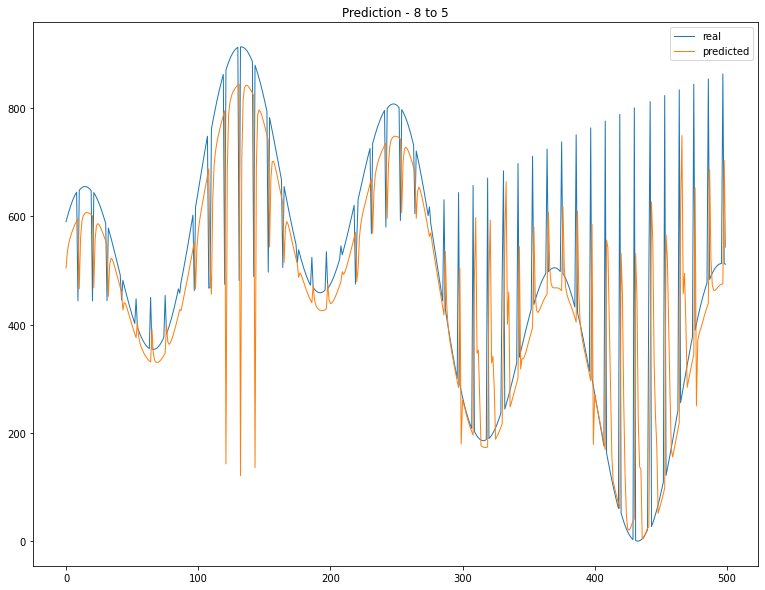

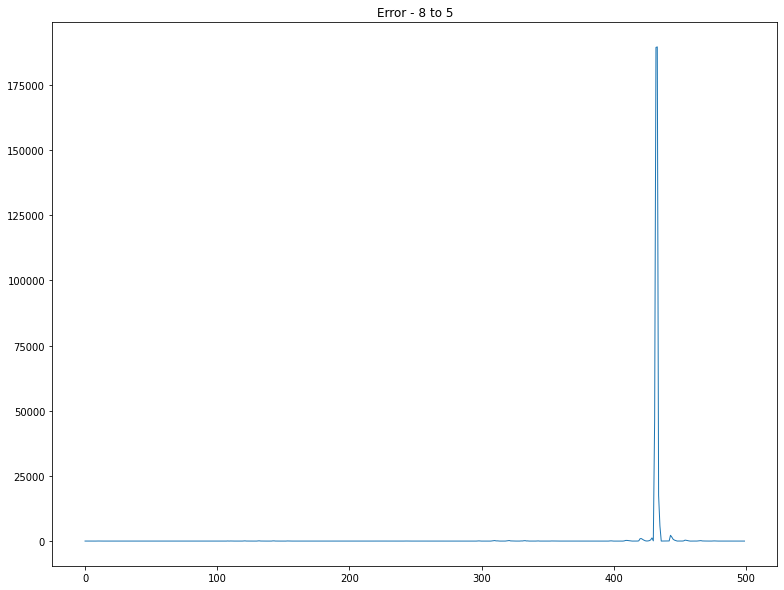

NODE 5 to 12 - TOTAL MAPE:  2.1226808163311843
NODE 5 to 12 - SECTION MAPE:  0.2574318625026772


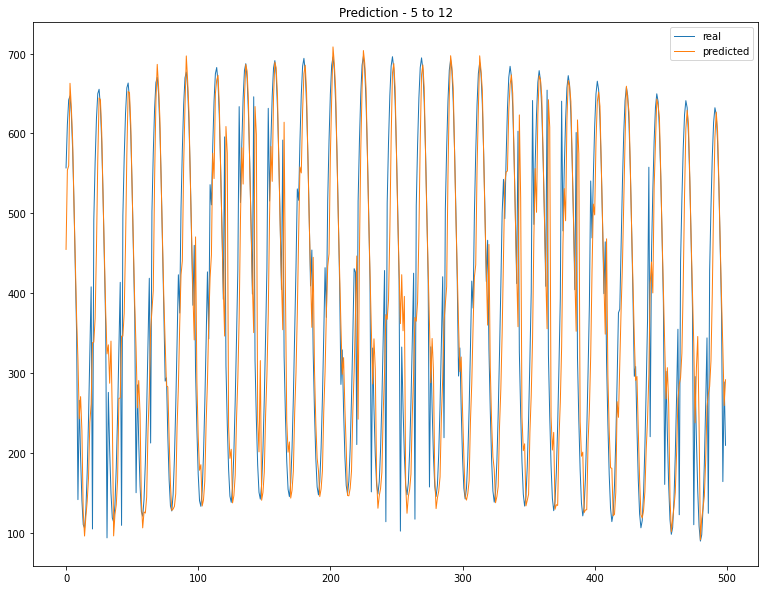

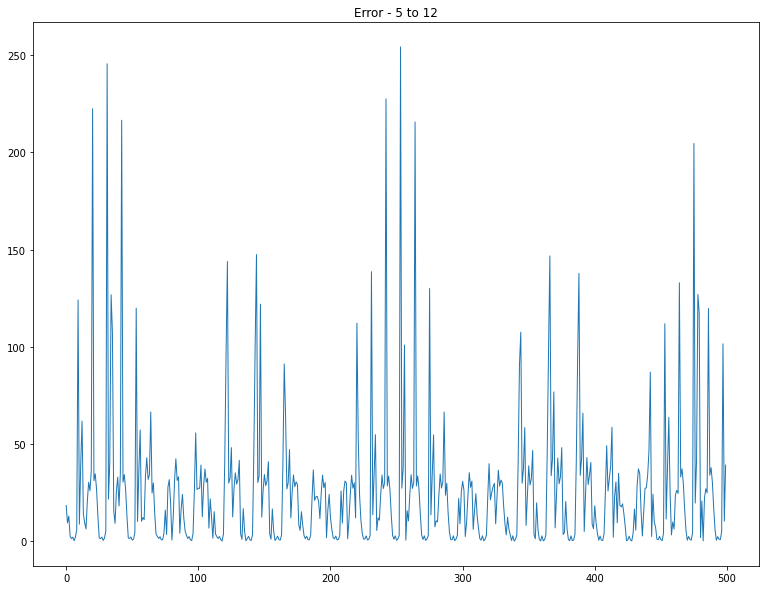

NODE 8 to 12 - TOTAL MAPE:  252.48824682117905
NODE 8 to 12 - SECTION MAPE:  875.0930147073235


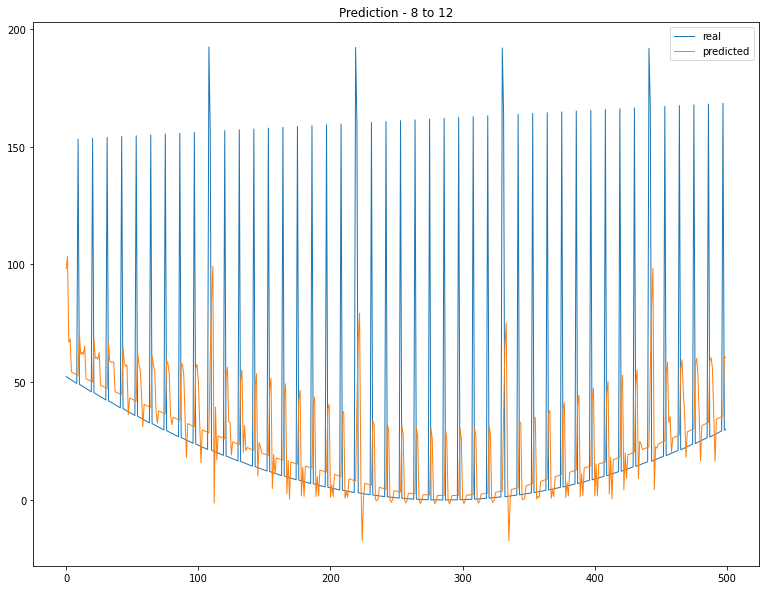

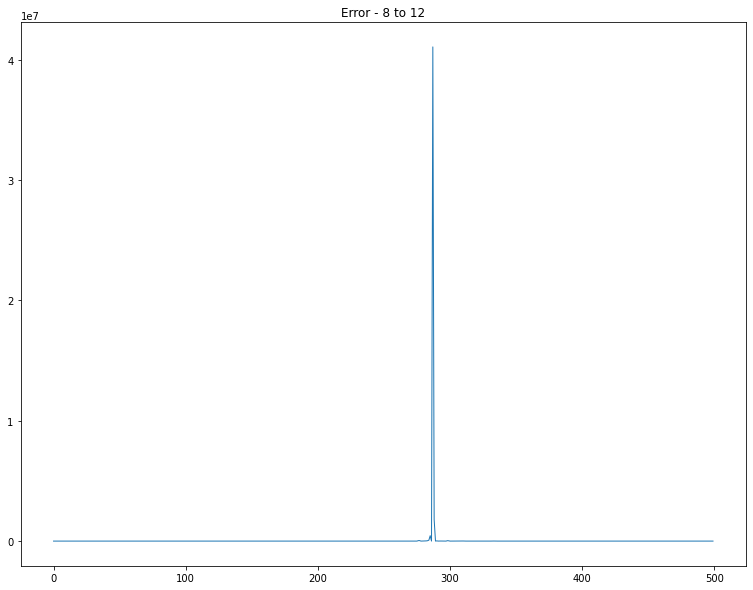

NODE 5 to 8 - TOTAL MAPE:  0.6412063571426898
NODE 5 to 8 - SECTION MAPE:  0.2403906714576084


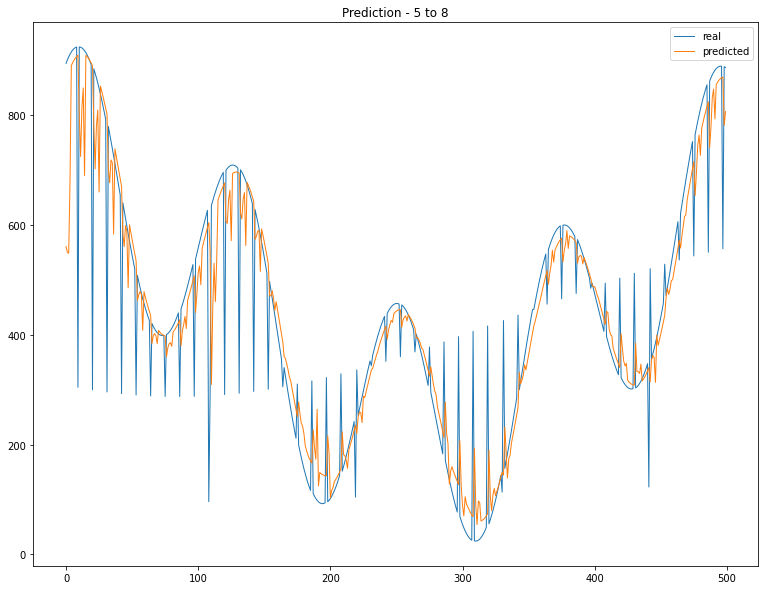

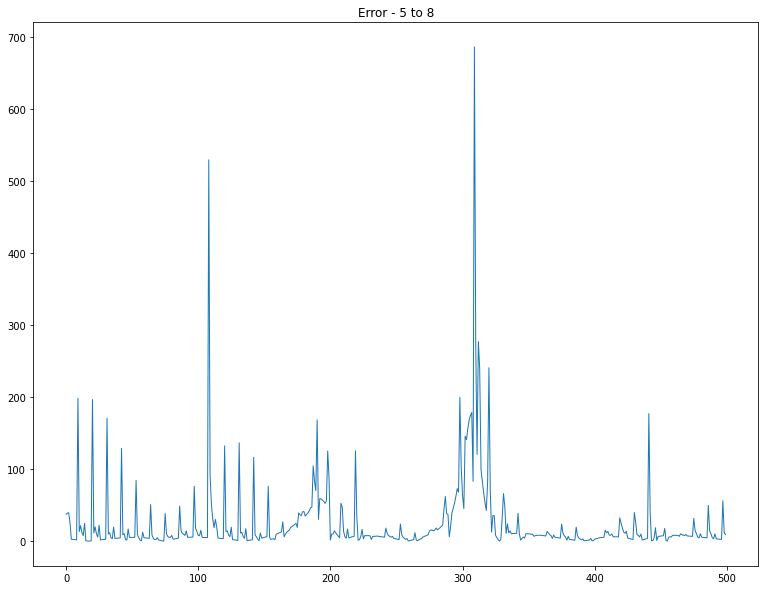

NODE 8 to 5 - TOTAL MAPE:  0.43189002990465514
NODE 8 to 5 - SECTION MAPE:  2.308444802362987


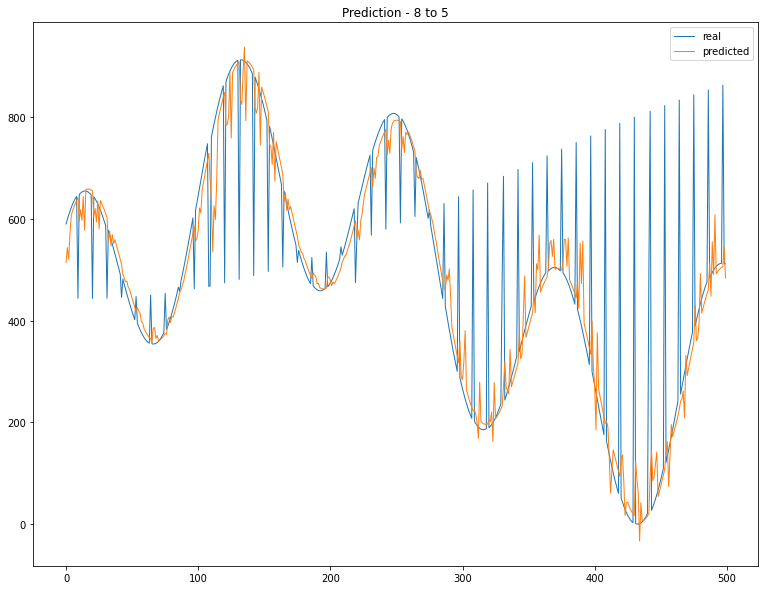

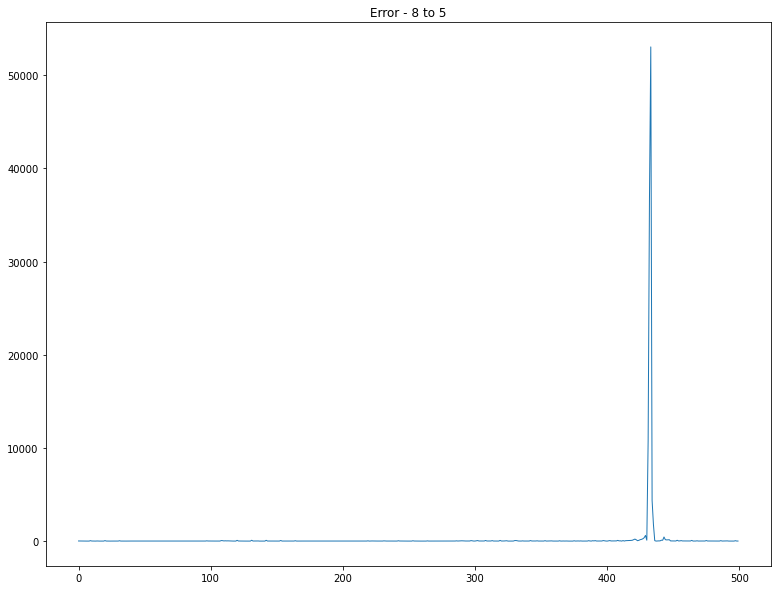

NODE 5 to 12 - TOTAL MAPE:  1.5914164800498916
NODE 5 to 12 - SECTION MAPE:  0.27623866130737573


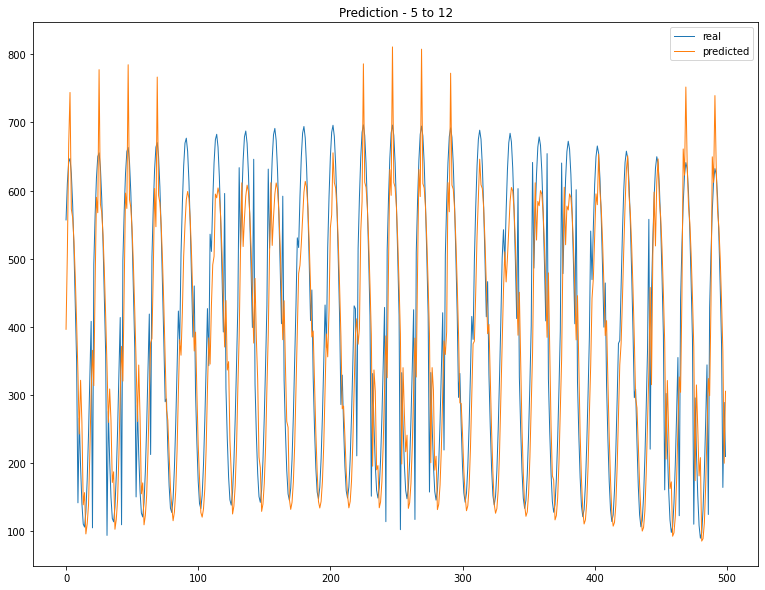

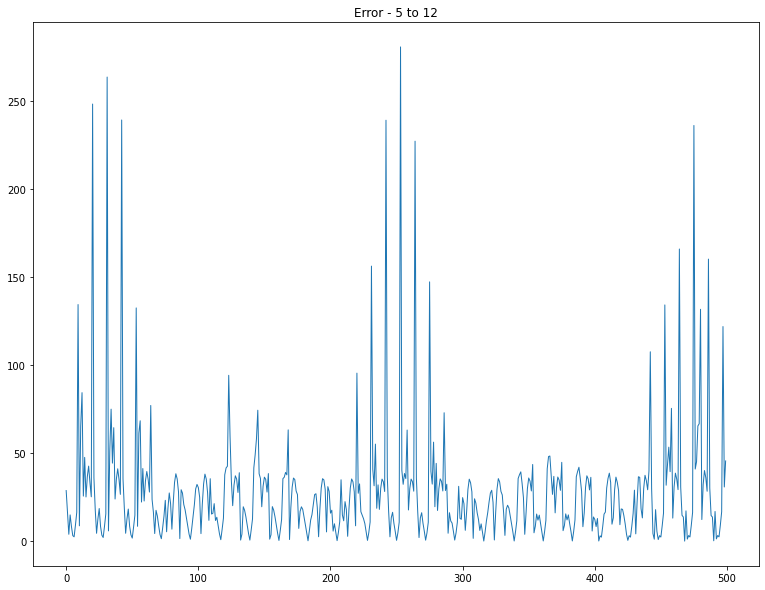

NODE 8 to 12 - TOTAL MAPE:  305.7986658995104
NODE 8 to 12 - SECTION MAPE:  938.4288535604821


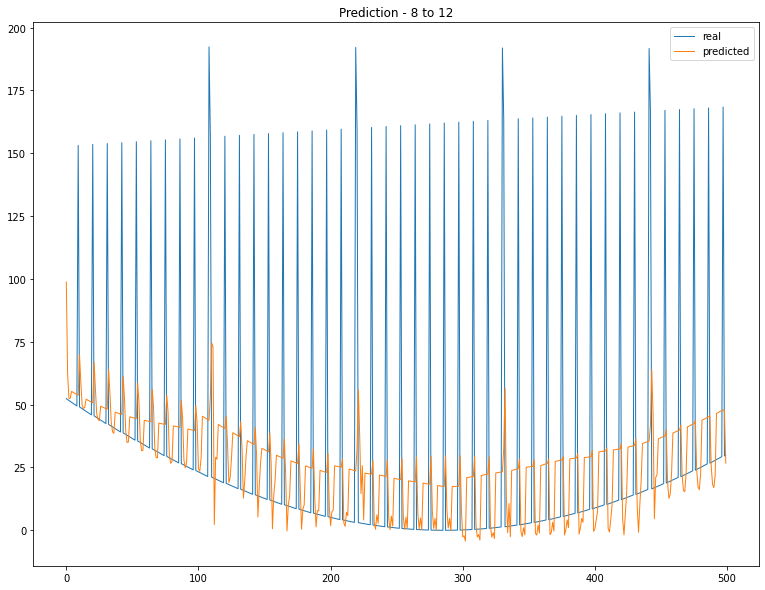

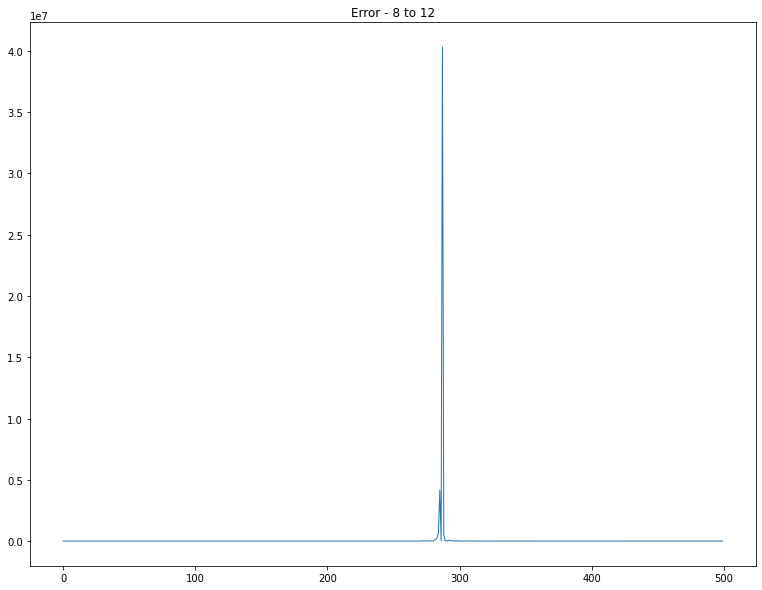

In [5]:
analyze_all_experiments_singlestep('LSTM_5_in_1_out', (50000, 50500))
analyze_all_experiments_singlestep('LSTM_CHUNK_5_in_1_out', (50000, 50500))

